# Action1：交通流量预测
JetRail高铁的乘客数量预测
数据集：jetrail.csv，根据过往两年的数据（2012 年 8 月至 2014 年 8月），需要用这些数据预测接下来 7 个月的乘客数量
以每天为单位聚合数据集

In [1]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plot

%matplotlib inline

Importing plotly failed. Interactive plots will not work.


In [2]:
# load data
jetrail = pd.read_csv('./jetrail.csv')
jetrail.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [3]:
jetrail.describe()

,ID,Count
count,18288.000000,18288.000000
mean,9143.500000,138.958115
std,5279.435197,153.467461
min,0.000000,2.000000
25%,4571.750000,22.000000
50%,9143.500000,84.000000
75%,13715.250000,210.000000
max,18287.000000,1244.000000


In [4]:
# 将Datetime转换成时间类型
jetrail['Datetime'] = pd.to_datetime(jetrail['Datetime'] , format='%d-%m-%Y %H:%M')
jetrail['Datetime']

0       2012-08-25 00:00:00
1       2012-08-25 01:00:00
2       2012-08-25 02:00:00
3       2012-08-25 03:00:00
4       2012-08-25 04:00:00
                ...        
18283   2014-09-25 19:00:00
18284   2014-09-25 20:00:00
18285   2014-09-25 21:00:00
18286   2014-09-25 22:00:00
18287   2014-09-25 23:00:00
Name: Datetime, Length: 18288, dtype: datetime64[ns]

In [5]:
# 将index更改为Datetime，Count改为y
jetrail.index = jetrail['Datetime']
jetrail['ds'] = jetrail['Datetime']
jetrail['y'] = jetrail['Count']
jetrail

,ID,Datetime,Count,ds,y
Datetime,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012-08-25 00:00:00,8
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012-08-25 01:00:00,2
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012-08-25 02:00:00,6
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012-08-25 03:00:00,2
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012-08-25 04:00:00,2
...,...,...,...,...,...
2014-09-25 19:00:00,18283,2014-09-25 19:00:00,868,2014-09-25 19:00:00,868
2014-09-25 20:00:00,18284,2014-09-25 20:00:00,732,2014-09-25 20:00:00,732
2014-09-25 21:00:00,18285,2014-09-25 21:00:00,702,2014-09-25 21:00:00,702


In [6]:
# 删除 ID、Datetime、Count字段
jetrail.drop(['ID','Datetime','Count'], axis=1, inplace=True)
jetrail

,ds,y
Datetime,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8
2012-08-25 01:00:00,2012-08-25 01:00:00,2
2012-08-25 02:00:00,2012-08-25 02:00:00,6
2012-08-25 03:00:00,2012-08-25 03:00:00,2
2012-08-25 04:00:00,2012-08-25 04:00:00,2
...,...,...
2014-09-25 19:00:00,2014-09-25 19:00:00,868
2014-09-25 20:00:00,2014-09-25 20:00:00,732
2014-09-25 21:00:00,2014-09-25 21:00:00,702


In [13]:
# 按天为单位进行重采样
day_train = jetrail.resample('D').sum()
day_train['ds'] = jetrail['ds'] 
day_train

,y,ds
Datetime,,
2012-08-25,76,2012-08-25
2012-08-26,88,2012-08-26
2012-08-27,62,2012-08-27
2012-08-28,58,2012-08-28
2012-08-29,60,2012-08-29
...,...,...
2014-09-21,9102,2014-09-21
2014-09-22,14116,2014-09-22
2014-09-23,13304,2014-09-23


In [27]:
# 创建prophet模型
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1,n_changepoints = 30，growth='linear')
model.fit(day_train)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
# 预测未来7 个月的乘客数量 210天
future = model.make_future_dataframe(periods=213) # 设置预测时长213天

forecast = model.predict(future) # 进行预测


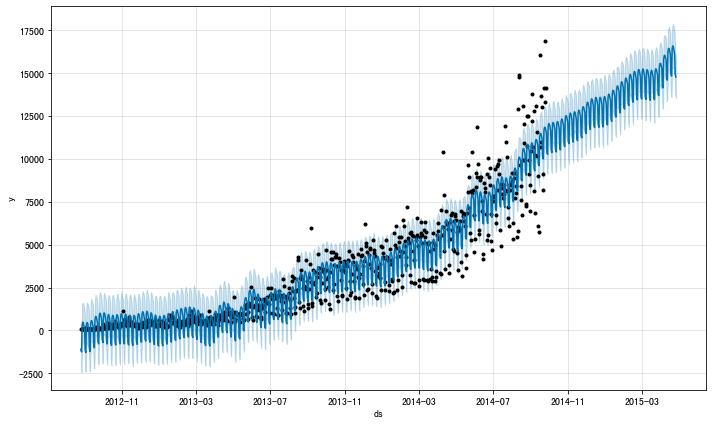

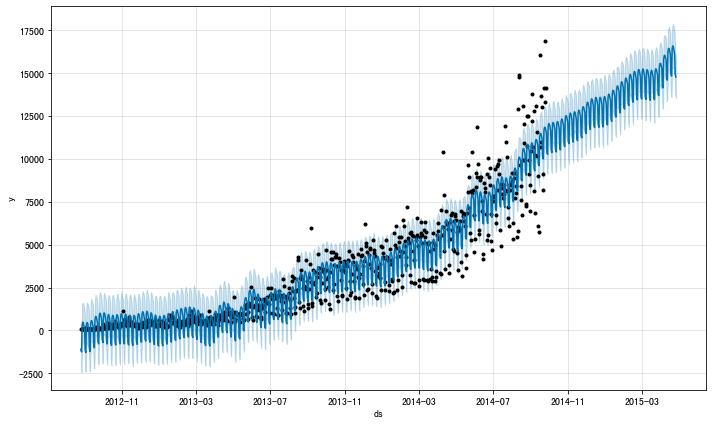

In [29]:
# 可视化数据集及预测score
model.plot(forecast)

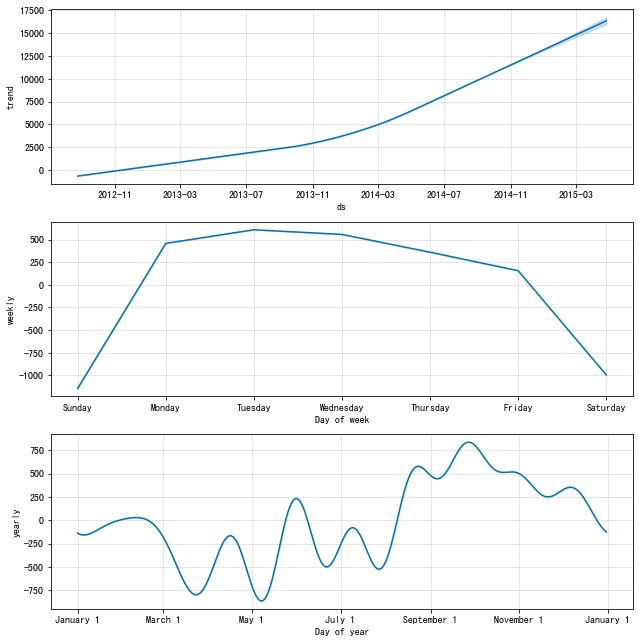

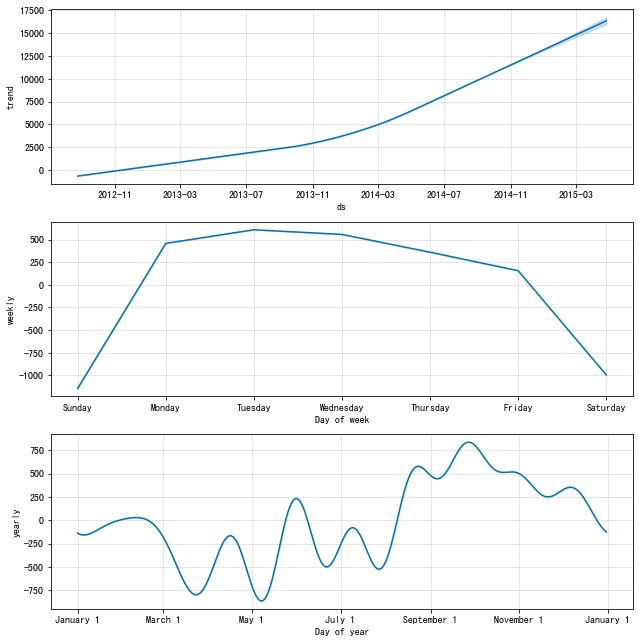

In [30]:
# 查看预测值的成分分析
model.plot_components(forecast)

In [32]:
# 查看预测结果用到哪些属性
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [33]:
# 查看预测后几条数据
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
970,2015-04-22,16246.872171,15295.764960,17779.577110,15871.041157,16624.468680,297.224975,297.224975,297.224975,556.469984,556.469984,556.469984,-259.245009,-259.245009,-259.245009,0.0,0.0,0.0,16544.097146
971,2015-04-23,16274.382018,14969.968023,17605.577184,15894.824491,16654.379749,64.360879,64.360879,64.360879,360.133794,360.133794,360.133794,-295.772915,-295.772915,-295.772915,0.0,0.0,0.0,16338.742897
972,2015-04-24,16301.891865,14910.402132,17411.464356,15919.823419,16684.179206,-180.898051,-180.898051,-180.898051,156.027963,156.027963,156.027963,-336.926014,-336.926014,-336.926014,0.0,0.0,0.0,16120.993814
973,2015-04-25,16329.401712,13728.941638,16209.023375,15944.822348,16713.798206,-1376.334646,-1376.334646,-1376.334646,-994.405515,-994.405515,-994.405515,-381.929131,-381.929131,-381.929131,0.0,0.0,0.0,14953.067066
974,2015-04-26,16356.911558,13561.723066,16038.877973,15969.821276,16743.195974,-1573.259263,-1573.259263,-1573.259263,-1143.354537,-1143.354537,-1143.354537,-429.904726,-429.904726,-429.904726,0.0,0.0,0.0,14783.652295


In [34]:
# 查看预测前几条数据
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-683.186648,-2258.000007,66.114975,-683.186648,-683.186648,-422.727587,-422.727587,-422.727587,-994.405515,-994.405515,-994.405515,571.677928,571.677928,571.677928,0.0,0.0,0.0,-1105.914235
1,2012-08-26,-675.100841,-2450.671517,-35.349207,-675.100841,-675.100841,-580.698669,-580.698669,-580.698669,-1143.354537,-1143.354537,-1143.354537,562.655868,562.655868,562.655868,0.0,0.0,0.0,-1255.799510
2,2012-08-27,-667.015034,-810.260521,1560.388948,-667.015034,-667.015034,1008.016553,1008.016553,1008.016553,457.240373,457.240373,457.240373,550.776180,550.776180,550.776180,0.0,0.0,0.0,341.001519
3,2012-08-28,-658.929227,-663.154969,1624.992494,-658.929227,-658.929227,1144.737302,1144.737302,1144.737302,607.887938,607.887938,607.887938,536.849364,536.849364,536.849364,0.0,0.0,0.0,485.808075
4,2012-08-29,-650.843420,-668.564720,1555.776846,-650.843420,-650.843420,1078.174751,1078.174751,1078.174751,556.469984,556.469984,556.469984,521.704767,521.704767,521.704767,0.0,0.0,0.0,427.331331


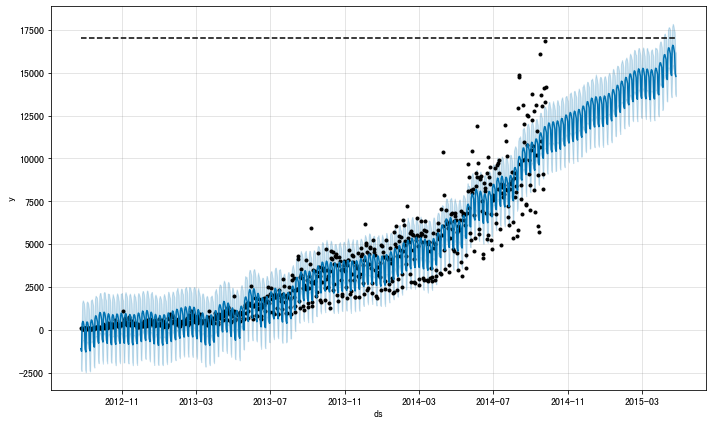

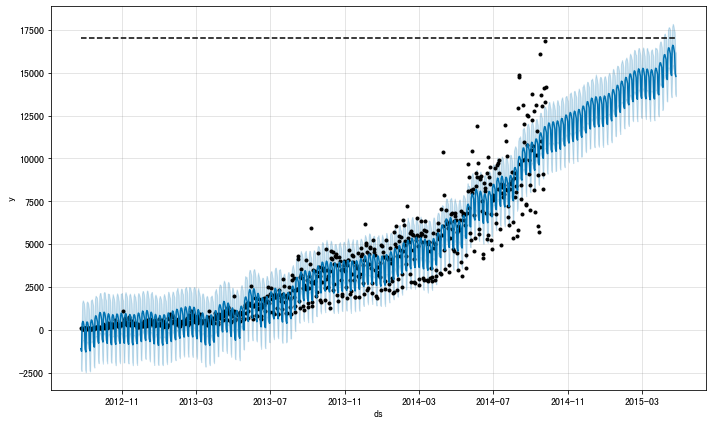

In [38]:
# 添加上、下限，最高17000，最少0
future['cap']=17000
future['floor']=0
forecast = model.predict(future) # 进行预测
model.plot(forecast)

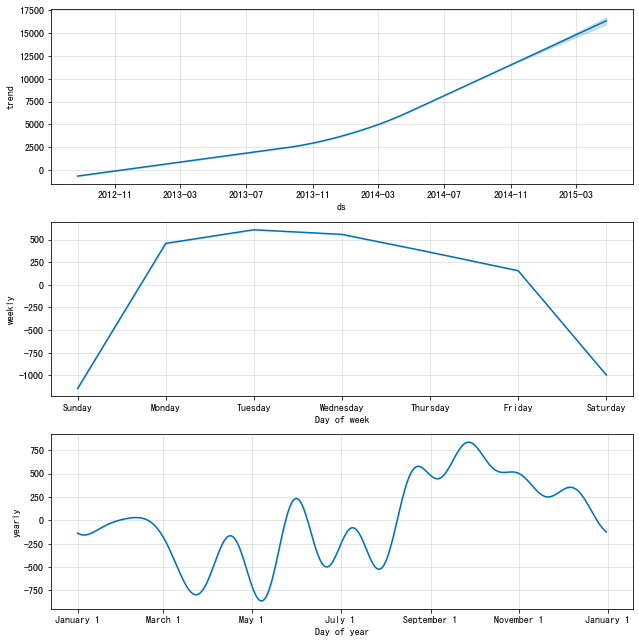

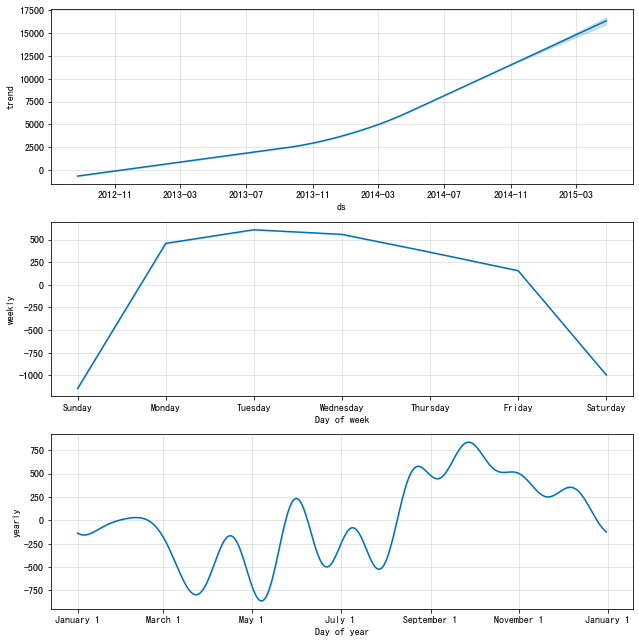

In [39]:
model.plot_components(forcast)

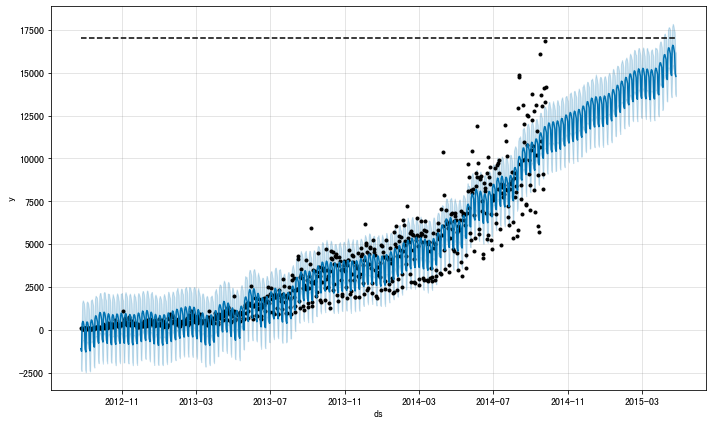

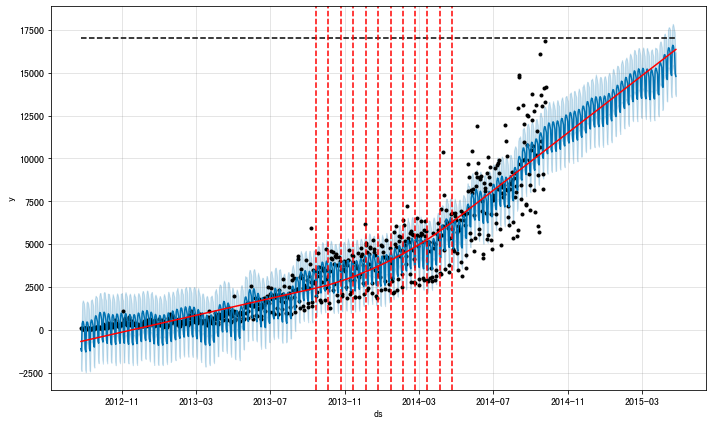

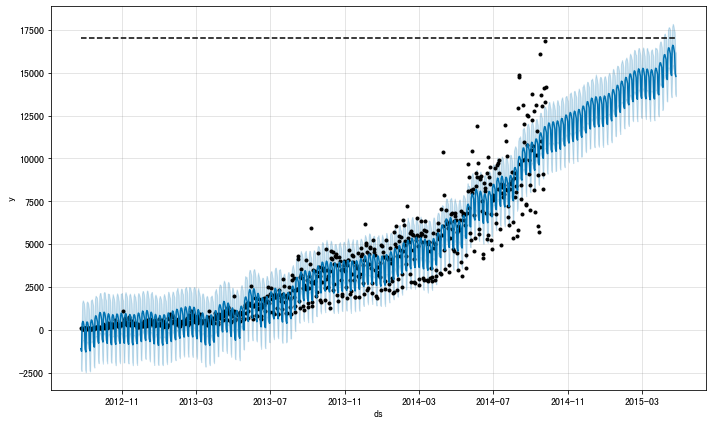

In [42]:
# 显示突变点的位置
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)
model.plot(forecast)

In [57]:
# 查看预测结果
print(forecast[['ds', 'trend','yhat']].tail(213))

            ds         trend          yhat
762 2014-09-26  10524.824009  11513.228773
763 2014-09-27  10552.333856  10394.045931
764 2014-09-28  10579.843703  10272.389617
765 2014-09-29  10607.353550  11896.420764
766 2014-09-30  10634.863397  12066.839146
..         ...           ...           ...
970 2015-04-22  16246.872171  16544.097146
971 2015-04-23  16274.382018  16338.742897
972 2015-04-24  16301.891865  16120.993814
973 2015-04-25  16329.401712  14953.067066
974 2015-04-26  16356.911558  14783.652295

[213 rows x 3 columns]
